# Linear Regression - Direct Method

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [8]:
class LinearRegressionDirect:
    def __init__(self, alpha=0.01,iteration=10000):
        self.alpha = alpha
        self.iteration = iteration
    
    def fit(self,X,y):
        X = np.asarray(X)
        Y = np.asarray(y)
        n = len(X)

        self.m = ((n * np.sum(X*Y)) - (np.sum(X) * np.sum(Y)))/((n * np.sum(X**2)) - (np.sum(X)**2))
        self.b = ((np.sum(Y) * np.sum(X**2)) - (np.sum(X) * np.sum(X*Y)))/((n * np.sum(X**2)) - (np.sum(X)**2))

        # return m_coef, b_intercept
    
    def predict(self, X):
        X = np.asarray(X)
        predictions = self.m*X + self.b
        return predictions
    
    def r2_score(self,Y_true,Y_predictions):
        r2 = (1 - (np.sum((Y_true - Y_predictions)**2)/(np.sum((Y_true - np.mean(Y_true))**2))))

## Create Synthetic Data

To understand the concept of linear regression, let's try to create a synthetic data that the coefficient and intercept are adjusted to be 0.8 and 0.05 respectively. The synthetic data is generated through the linear equation `y = mx + b` as follows

Text(0, 0.5, 'Y')

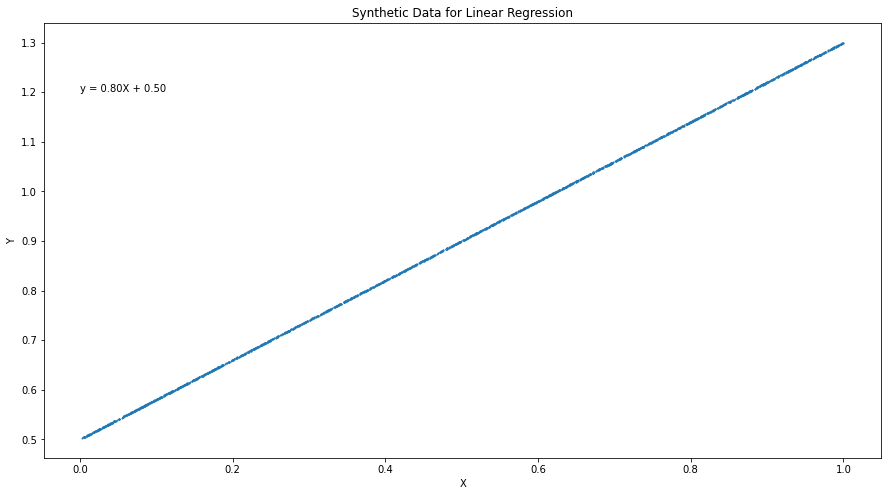

In [4]:
# synthetic data
m_synth, b_synth = 0.8, 0.5
np.random.seed(42)
feature = np.random.rand(1,2000)
target = (m_synth * feature) + b_synth

X = feature[0]
y = target[0]

eq = 'y = %.2fX + %.2f' % (m_synth, b_synth)

fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(X,y,s=1)
ax.text(0, 1.2, eq)
ax.set_title('Synthetic Data for Linear Regression')
ax.set_xlabel('X')
ax.set_ylabel('Y')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [6]:
df_train_data = pd.DataFrame(
    {
    'X_train_o': X_train.tolist(),
    'y_train_o': y_train.tolist()
    }
)

df_train_data.head()

,X_train_o,y_train_o
0,0.367759,0.794207
1,0.520308,0.916246
2,0.018391,0.514713
3,0.453790,0.863032
4,0.800357,1.140285


In [7]:
df_test_data = pd.DataFrame(
    {
    'X_test_o': X_test.tolist(),
    'y_test_o': y_test.tolist()
    }
)

df_test_data.head()

,X_test_o,y_test_o
0,0.776447,1.121158
1,0.162934,0.630348
2,0.996334,1.297067
3,0.892672,1.214137
4,0.078578,0.562863


Manual

In [9]:
lrDirect = LinearRegressionDirect()
lrDirect.fit(np.asarray(df_train_data['X_train_o']).reshape(-1,1), np.asarray(df_train_data['y_train_o']).reshape(-1,1))
m_train_direct = lrDirect.m
b_train_direct = lrDirect.b

Scikit-Learn

In [11]:
lrSL = LinearRegression()
lrSL.fit(np.asarray(df_train_data['X_train_o']).reshape(-1,1), np.asarray(df_train_data['y_train_o']).reshape(-1,1))
m_train_SL = lrSL.coef_[0][0]
b_train_SL = lrSL.intercept_[0]

In [14]:
df_train_coef = pd.DataFrame(
    {
        'feature':['Feature'],
        'm_train_direct': [m_train_direct],
        'b_train_direct': [b_train_direct],
        'm_train_SL': [m_train_SL],
        'b_train_SL': [b_train_SL]
    }
)

df_train_coef.head()

,feature,m_train_direct,b_train_direct,m_train_SL,b_train_SL
0,Feature,0.8,0.5,0.8,0.5
